In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Read Data

In [2]:
df=pd.read_csv('Argentina.csv')
df=df.dropna()
df.set_index('date', inplace=True)
print('Shape of data',df.shape)
df.head()
df.pop('location')
y=df.iloc[:,-1]
X=df.iloc[:,:3]
X=pd.DataFrame(X)
y=pd.DataFrame(y)
X.head()

Shape of data (647, 12)


,new_cases,reproduction_rate,total_vaccinations_per_hundred
date,,,
7/1/2020,2667,1.19,0.0
7/2/2020,2744,1.18,0.0
7/3/2020,2845,1.18,0.0
7/4/2020,2590,1.19,0.0
7/5/2020,2439,1.19,0.0


#Plot Your Data

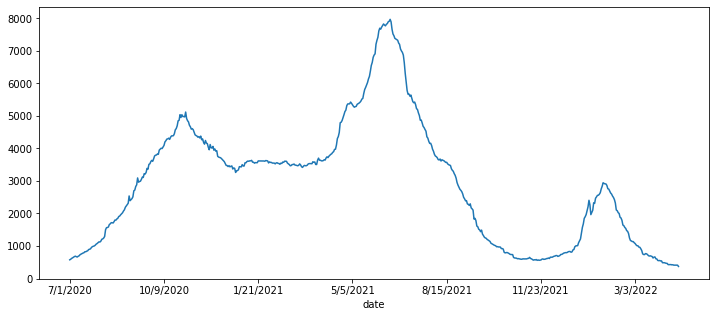

In [3]:
df['icu_patients'].plot(figsize=(12,5))

#Check For Stationarity

In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [5]:
adf_test(df['icu_patients'])

1. ADF :  -1.844957410733631
2. P-Value :  0.3583808806367597
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 639
5. Critical Values :
	 1% :  -3.4406250605731623
	 5% :  -2.8660736839408383
	 10% :  -2.5691843911285486


#Split Data into Training and Testing

In [17]:
X_train= X.iloc[:-15]
y_train=y.iloc[:-15]
X_test=X[-15:]
y_test=y.iloc[-15:]
#print(test.iloc[0],test.iloc[-1])

In [18]:
X_test.head()

,new_cases,reproduction_rate,total_vaccinations_per_hundred
date,,,
4/4/2022,1974,0.68,213.42
4/5/2022,2228,0.70,213.58
4/6/2022,2082,0.70,213.73
4/7/2022,1842,0.70,213.87
4/8/2022,1993,0.68,214.03


In [19]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(ts, model='additive')
#result.plot()
#plt.show()

## Train the Model

In [20]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           icu_patients   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              484.3
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                   5.47e-163
Time:                        22:49:08   Log-Likelihood:                         -5681.1
No. Observations:                 632   AIC:                                  1.137e+04
Df Residuals:                     629   BIC:                                  1.138e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
new_cases                          0.0267      0.004      6.620      0.000       0.019       0.035
reproduction_rate               2897.8025    103.628     27.963      0.000    2694.303    3101.302
total_vaccinations_per_hundred    -9.8764      1.002     -9.855      0.000     -11.844      -7.908
==============================================================================
Omnibus:                        5.080   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.304
Skew:                          -0.147   Prob(JB):                       0.0705
Kurtosis:                       3.340   Cond. No.                     3.31e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Make Predictions on Test Set

In [22]:
pred=model.predict(X_test)

In [12]:
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

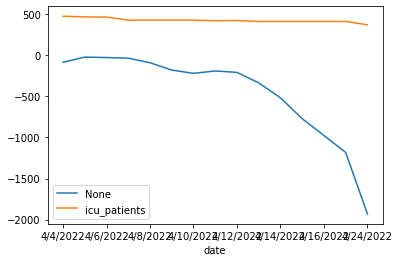

In [23]:
pred.plot(legend='ARIMA Predictions')
y_test['icu_patients'].plot(legend=True)

In [14]:
y_test['icu_patients'].mean()

504.6333333333333

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,y_test['icu_patients']))
print(rmse)


1014.2275422453396


#For Future Dates

In [16]:
index_future_dates=pd.date_range(start='2022-04-24',end='2022-05-24')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

NameError: ignored

In [ ]:
pred.plot(figsize=(12,5),legend=True)
